### Import

In [5]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

%matplotlib inline

### Gather Data

In [6]:
boston_dataset = load_boston()

In [7]:
dir(boston_dataset)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [8]:
# print(boston_dataset.DESCR)

In [9]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

### Data exploration with Pandas

In [10]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [220]:
data = pd.DataFrame(data=boston_dataset.data, columns = boston_dataset.feature_names)
data['PRICE'] = boston_dataset.target

In [221]:
data
# data.head()
# data.tail()
# data.count()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
0       15.3  396.90   4.98   24.0  
1       17.8  396.90   9.14   21.6  
2       17.8  392.83   4.03   34.7  
3       18.7  394.63   2.94   33.4  
4       18.7  396.90   5.33   36.2  
..       ...     ...    ...    ...  
501     21.0  391.99   9.67   22.4  
502     21.0  396.90   9.08   20.6  
503     21.0  396.90   5.64   23.9  
504     21.0  393.45   6.48   22.0  
505     21.0  396.90   7.88   11.9  

[506 rows x 14 columns]

### Cleaning data

In [222]:
pd.isnull(data).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [223]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


### Visualising data

<function matplotlib.pyplot.show(close=None, block=None)>

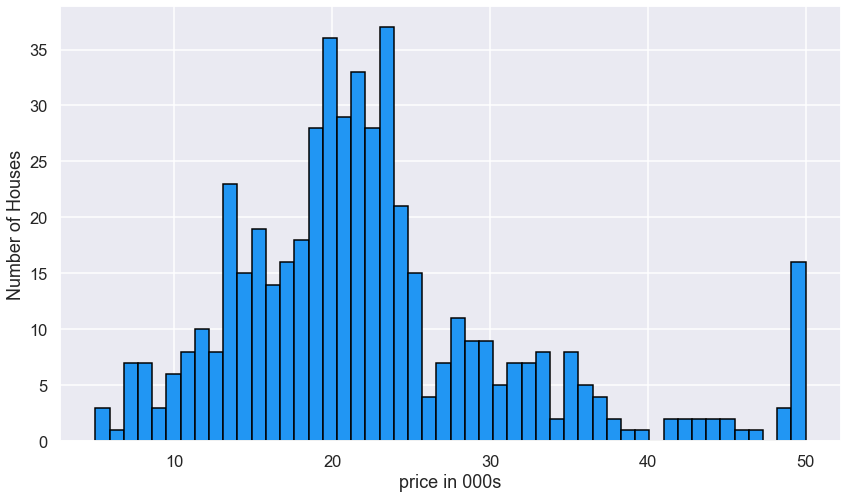

In [224]:
plt.figure(figsize=(14,8))
plt.hist(data["PRICE"], bins = 50,ec="black", color="#2196f3")
plt.xlabel("price in 000s")
plt.ylabel("Number of Houses")

plt.show

<Figure size 1008x576 with 0 Axes>

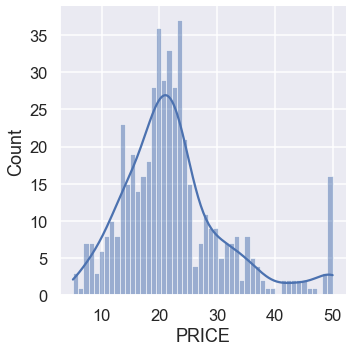

In [225]:
plt.figure(figsize=(14,8))
sns.displot(data["PRICE"], kde="True", bins =50)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

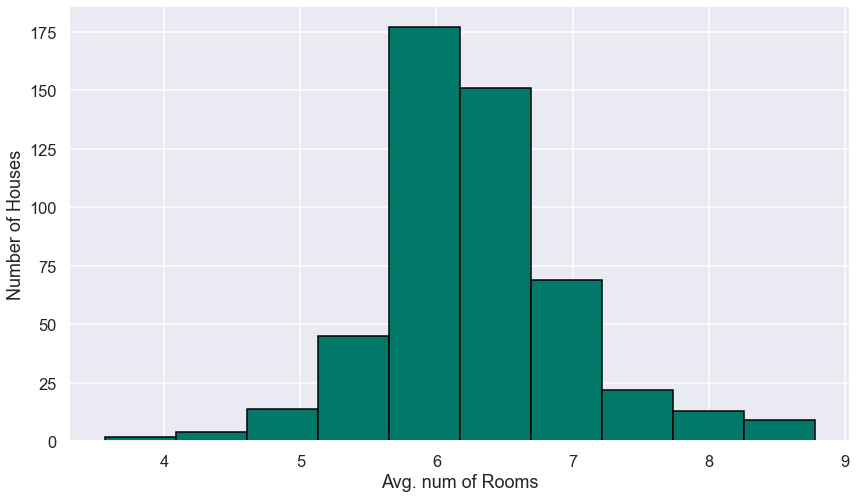

In [226]:
plt.figure(figsize=(14,8))
plt.hist(data["RM"],ec="black", color="#00796b")
plt.xlabel("Avg. num of Rooms")
plt.ylabel("Number of Houses")

plt.show

In [227]:
data["RM"].mean()

6.284634387351787

<function matplotlib.pyplot.show(close=None, block=None)>

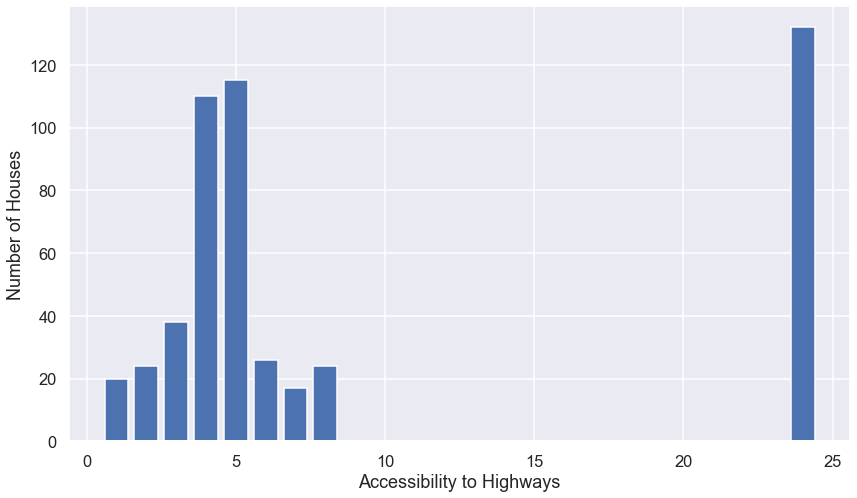

In [228]:
freq = data["RAD"].value_counts()
plt.figure(figsize=(14,8))
plt.xlabel("Accessibility to Highways")
plt.ylabel("Number of Houses")
plt.bar(freq.index, height=freq)

plt.show

### Descriptive Statistics

In [229]:
data.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT       PRICE  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

### Correlation
$ \rho _{XY} = corr(X,Y) $

$ -1.0 \leq \rho _{XY} \leq +1.0 $

In [230]:
data.corr()

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
PRICE   -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT     PRICE  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
PRICE    0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

In [231]:
mask = np.zeros_like(data.corr())
triangle_indices =np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

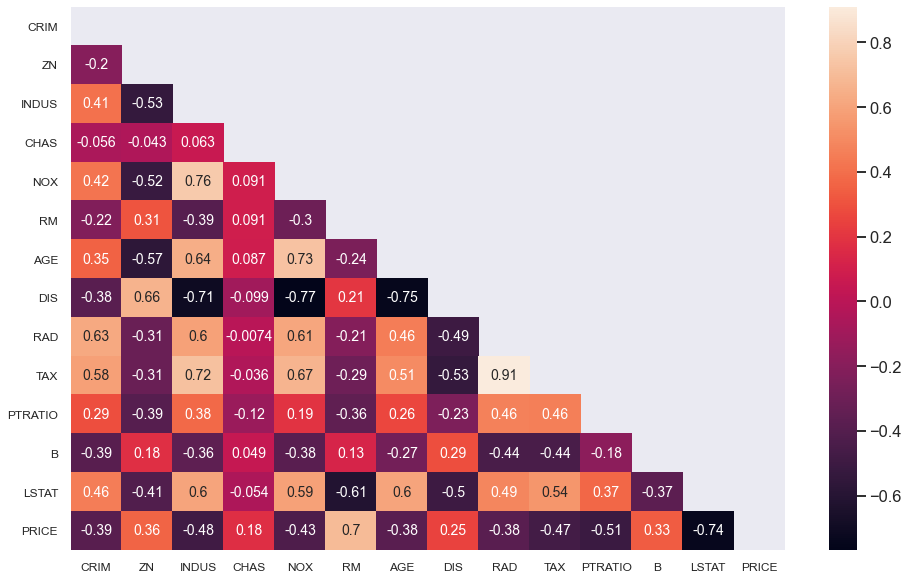

In [232]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), mask=mask,annot=True, annot_kws={"size": 14})
sns.set_style("white")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

[]

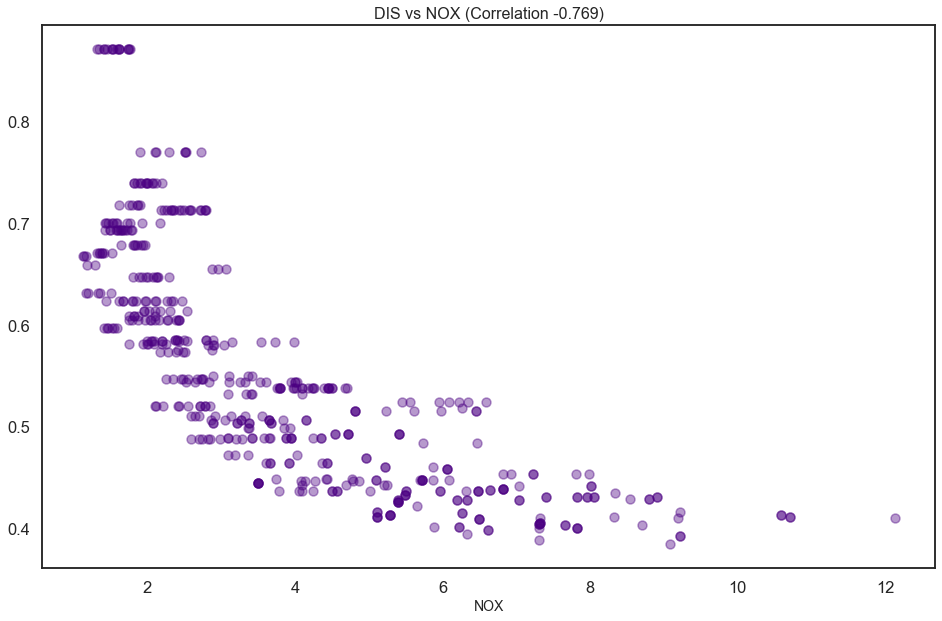

In [233]:
nox_dis_corr = round(data["NOX"].corr(data["DIS"]),3)

plt.figure(figsize=(16,10))
plt.scatter(x=data["DIS"], y=data["NOX"], alpha= 0.4, s=80, color="indigo")

plt.title(f"DIS vs NOX (Correlation {nox_dis_corr})", fontsize= 16)
plt.xlabel("DIS", fontsize= 14)
plt.xlabel("NOX", fontsize= 14)

plt.plot()

C:\Users\mbatu\anaconda3\lib\site-packages\seaborn\axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


[]

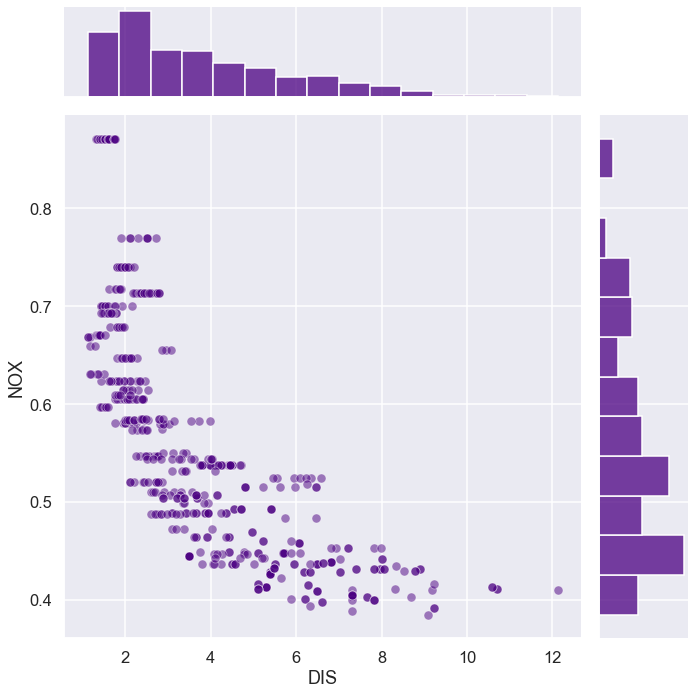

In [234]:
sns.set()
sns.set_context("talk")
sns.set_style("darkgrid")
sns.jointplot(x=data["DIS"], y=data["NOX"], size=10, color="indigo", joint_kws={"alpha":0.5})
plt.plot()

C:\Users\mbatu\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


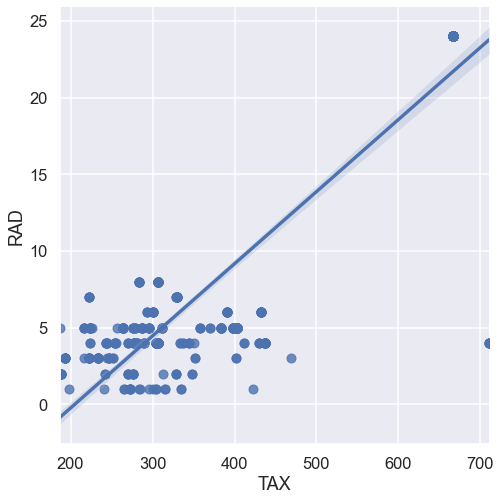

In [235]:
sns.lmplot(x="TAX", y="RAD", data=data, size=7)

[]

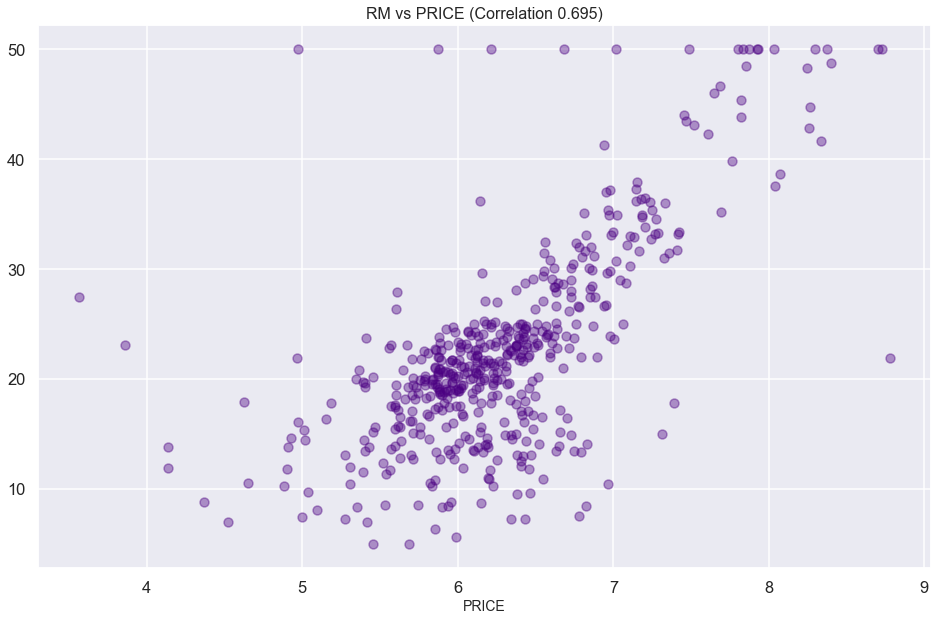

In [236]:
rm_tgt_corr = round(data["RM"].corr(data["PRICE"]),3)

plt.figure(figsize=(16,10))
plt.scatter(x=data["RM"], y=data["PRICE"], alpha= 0.4, s=80, color="indigo")

plt.title(f"RM vs PRICE (Correlation {rm_tgt_corr})", fontsize= 16)
plt.xlabel("RM", fontsize= 14)
plt.xlabel("PRICE", fontsize= 14)

plt.plot()

C:\Users\mbatu\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


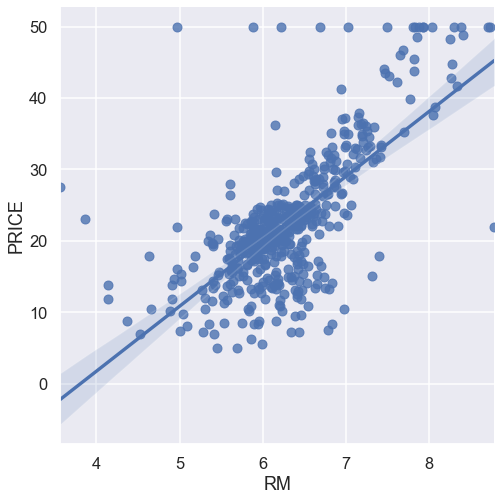

In [237]:
sns.lmplot(x="RM", y="PRICE", data=data, size=7)
plt.show()

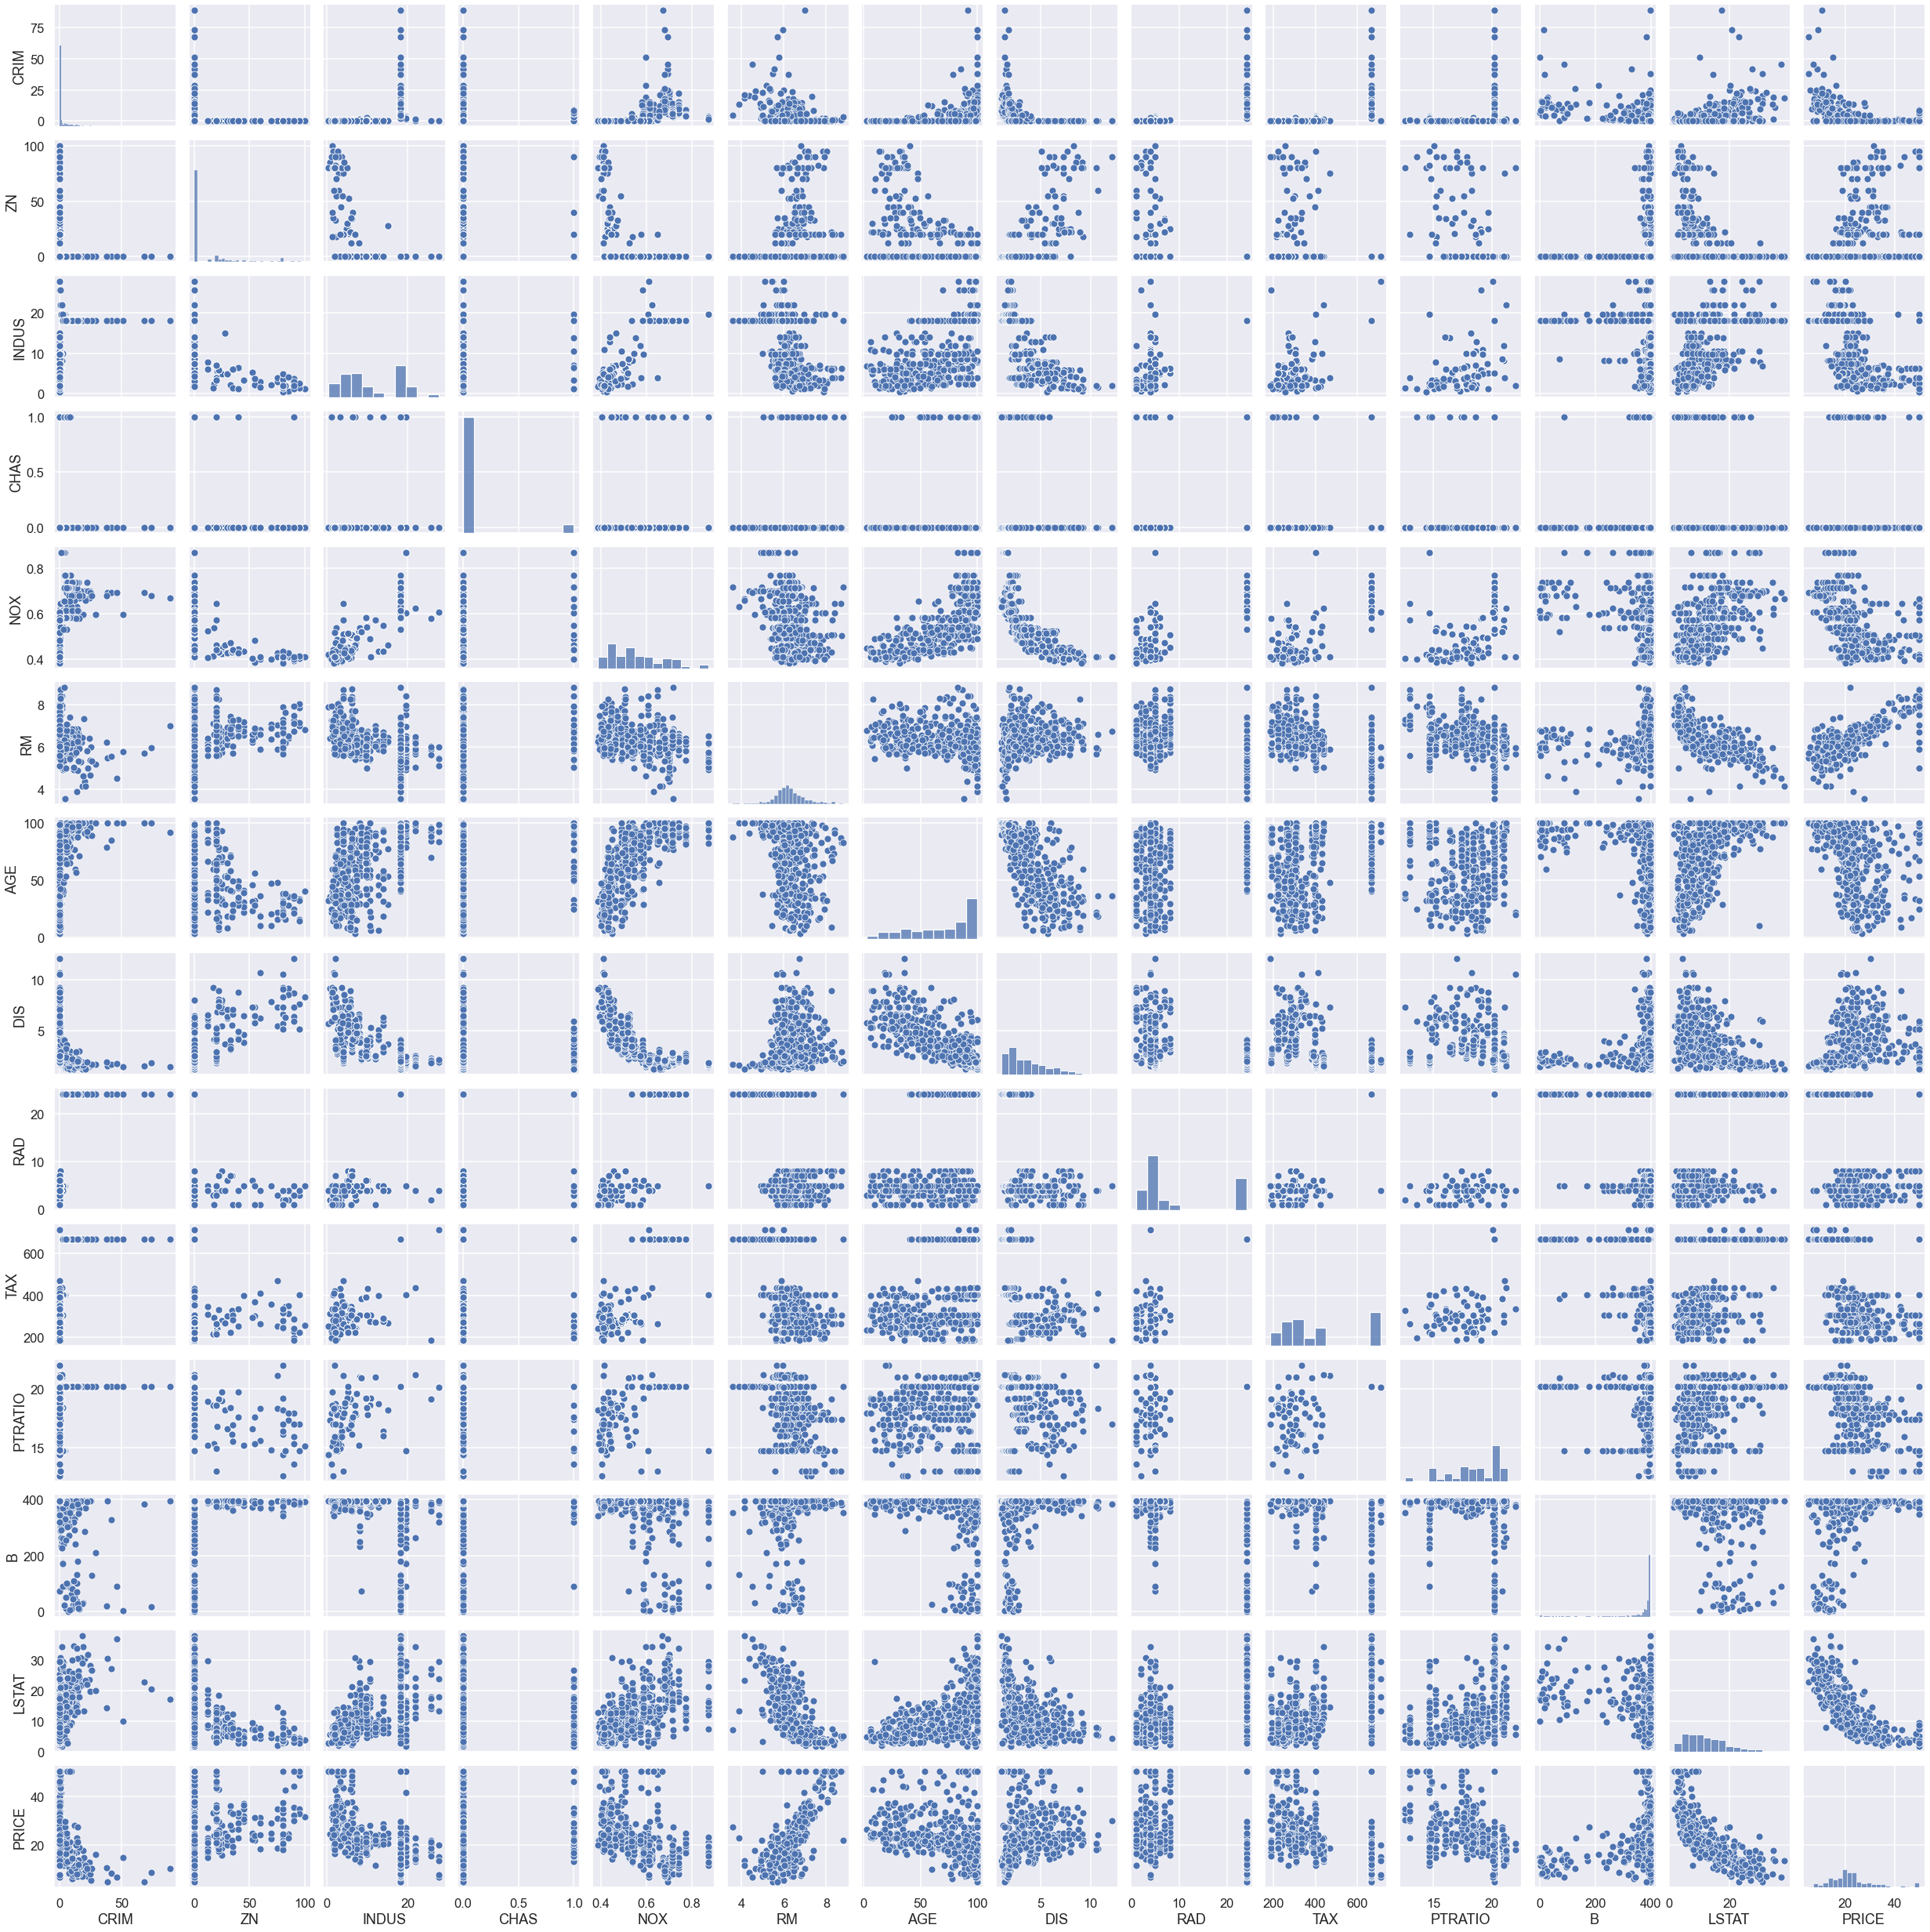

In [238]:
# sns.pairplot(data)
# plt.show() 

[]

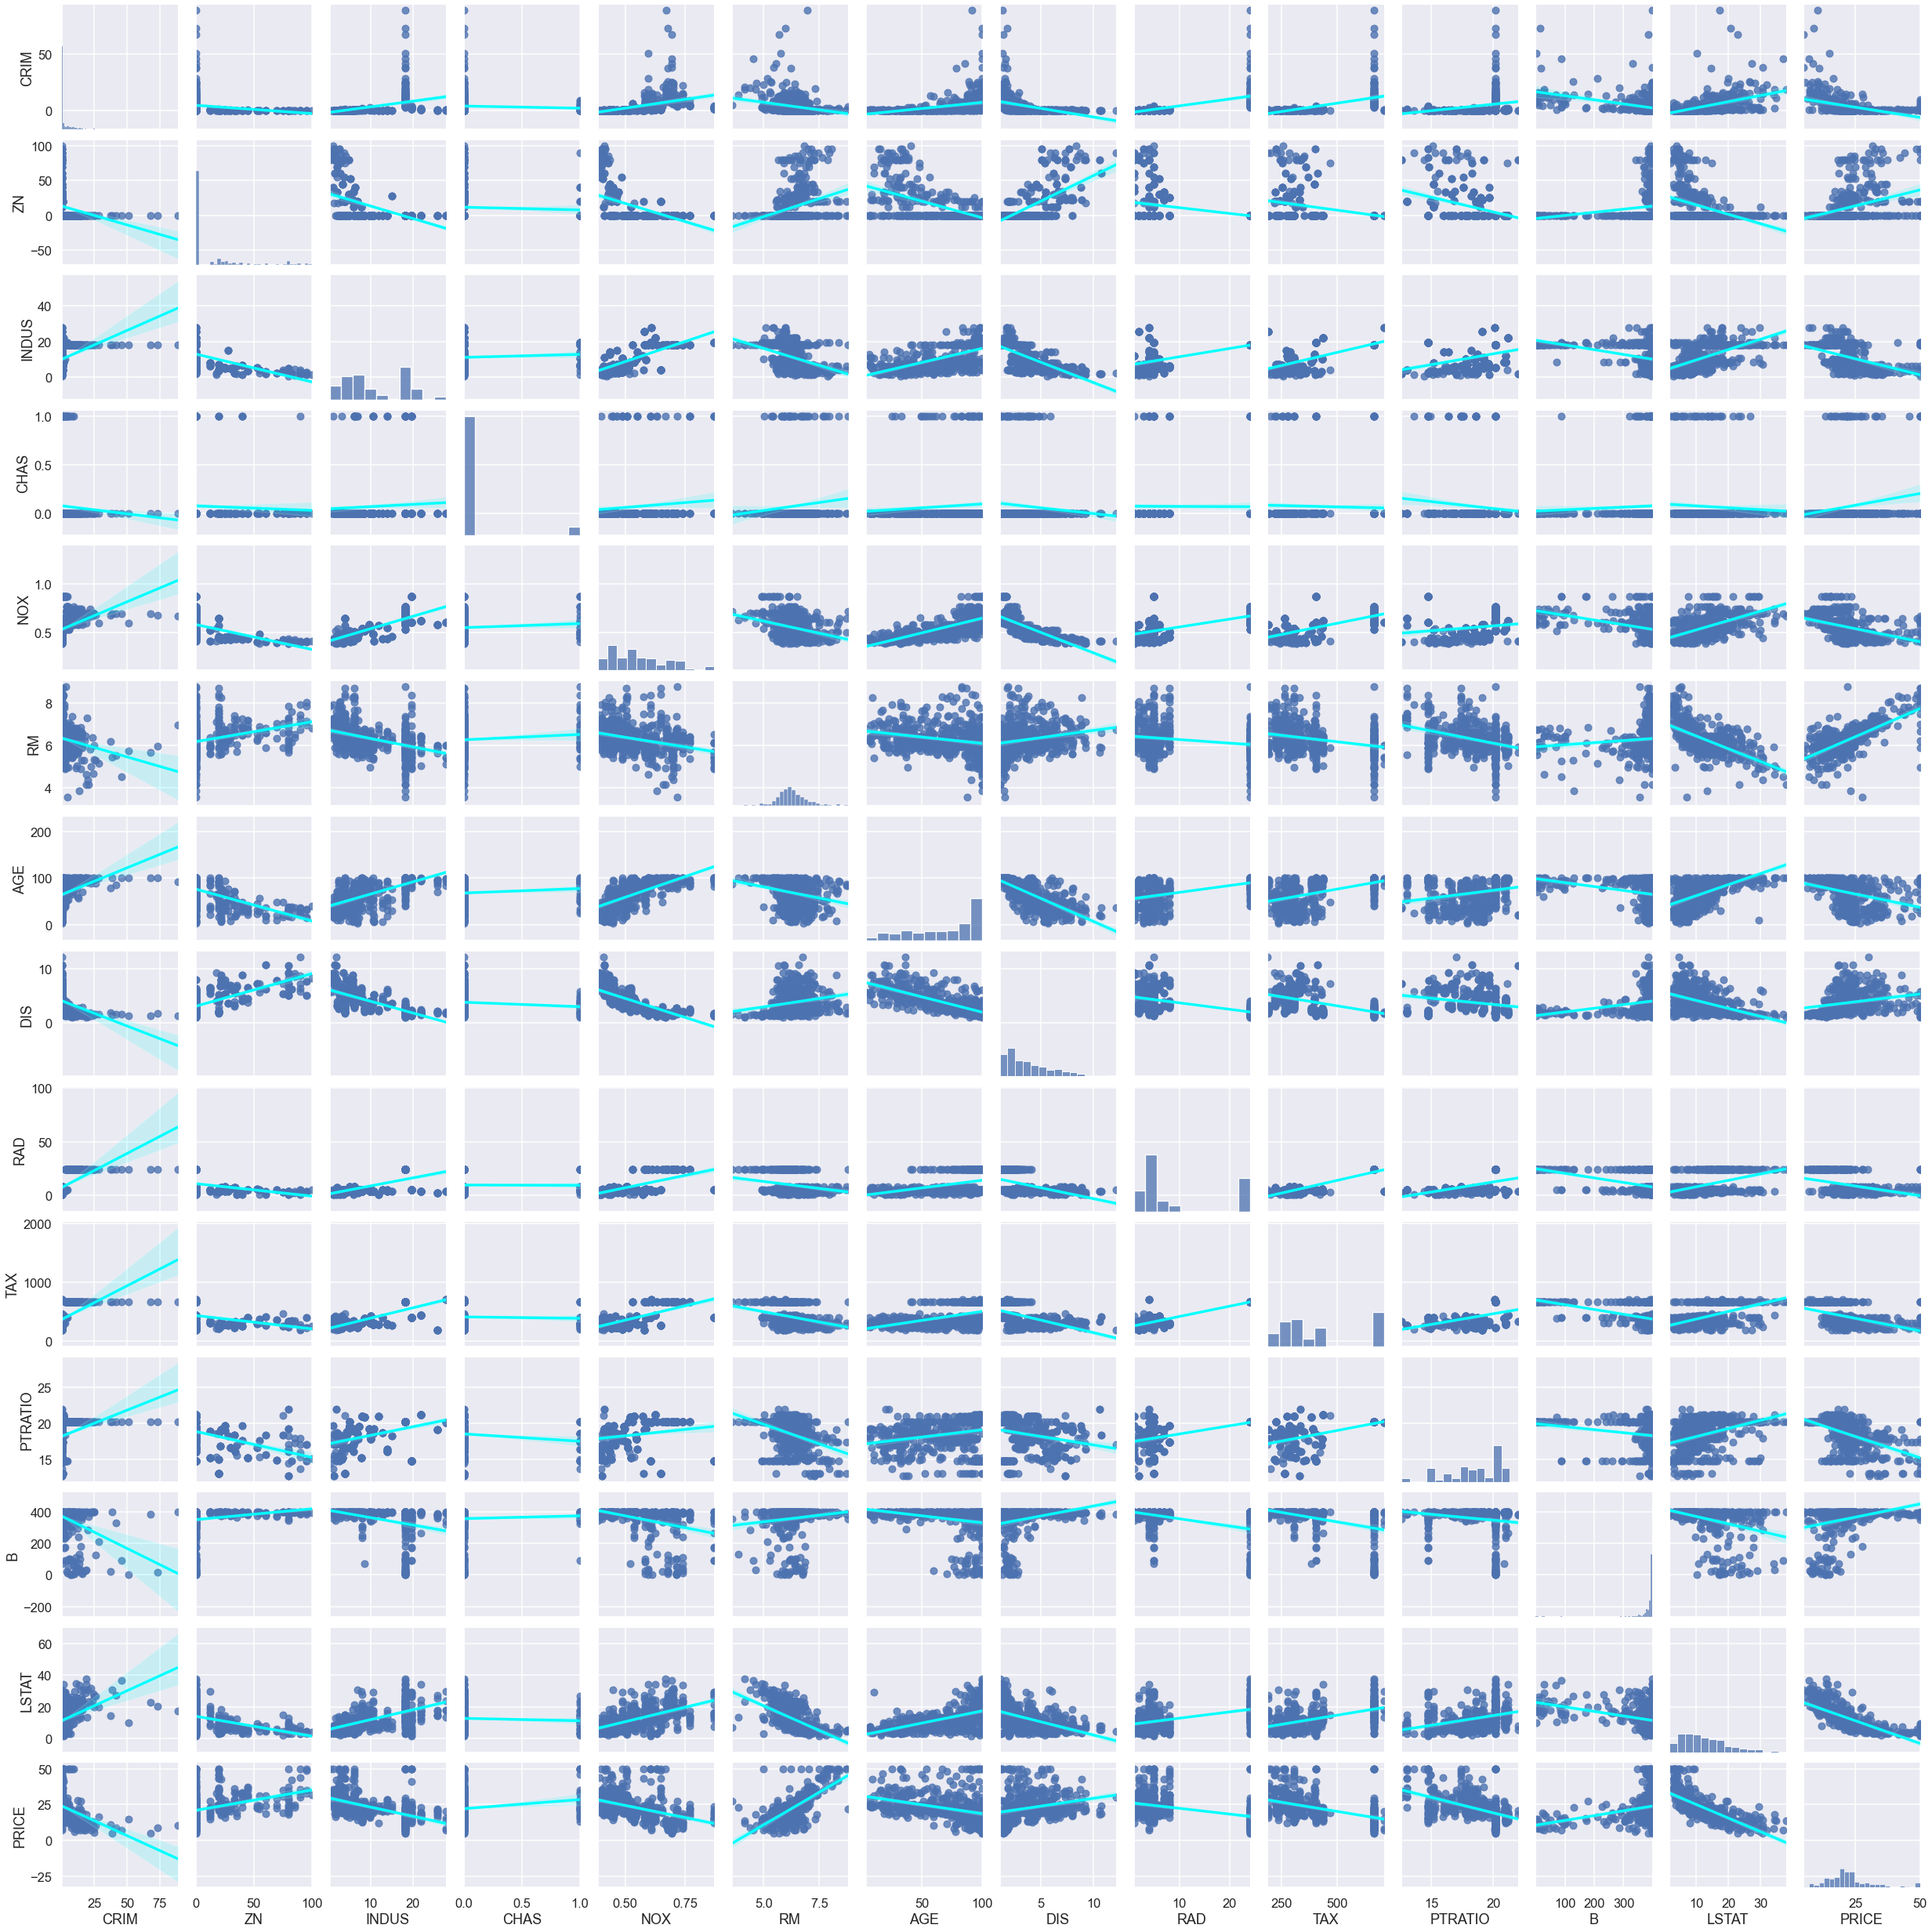

In [239]:
# sns.pairplot(data, kind="reg", plot_kws={"line_kws": {"color":"cyan"}})
# plt.plot()

### Trainig and Test Dataset Split

In [240]:
prices = data["PRICE"]
features = data.drop("PRICE", axis =1)

X_train, X_test, Y_train, Y_test = train_test_split(features, prices, 
 test_size= 0.2, random_state= 10)

# % Training set
len(X_train)/len(features)

0.7984189723320159

In [241]:
# % of test data set
X_test.shape[0]/features.shape[0]

0.2015810276679842

### Multivariable Regression

In [242]:
regr= LinearRegression()
regr.fit(X_train, Y_train)

print("Intercept: ", regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=["coef"])


Intercept:  36.53305138282439


coef
CRIM     -0.128181
ZN        0.063198
INDUS    -0.007576
CHAS      1.974515
NOX     -16.271989
RM        3.108456
AGE       0.016292
DIS      -1.483014
RAD       0.303988
TAX      -0.012082
PTRATIO  -0.820306
B         0.011419
LSTAT    -0.581626

In [243]:
print("Training data r-squared: ", regr.score(X_train, Y_train))
print("test data r-squared: ", regr.score(X_test, Y_test))

Training data r-squared:  0.750121534530608
test data r-squared:  0.6709339839115628


### Data Transformation

In [244]:
data["PRICE"].skew()

1.1080984082549072

In [245]:
y_log= np.log(data["PRICE"])
y_log

0      3.178054
1      3.072693
2      3.546740
3      3.508556
4      3.589059
         ...   
501    3.109061
502    3.025291
503    3.173878
504    3.091042
505    2.476538
Name: PRICE, Length: 506, dtype: float64

In [246]:
y_log.skew()

-0.33032129530987864

C:\Users\mbatu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


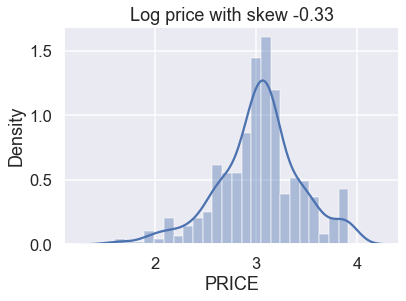

In [247]:
sns.distplot(y_log)
plt.title(f"Log price with skew {round(y_log.skew(),3)}")
plt.show()

C:\Users\mbatu\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


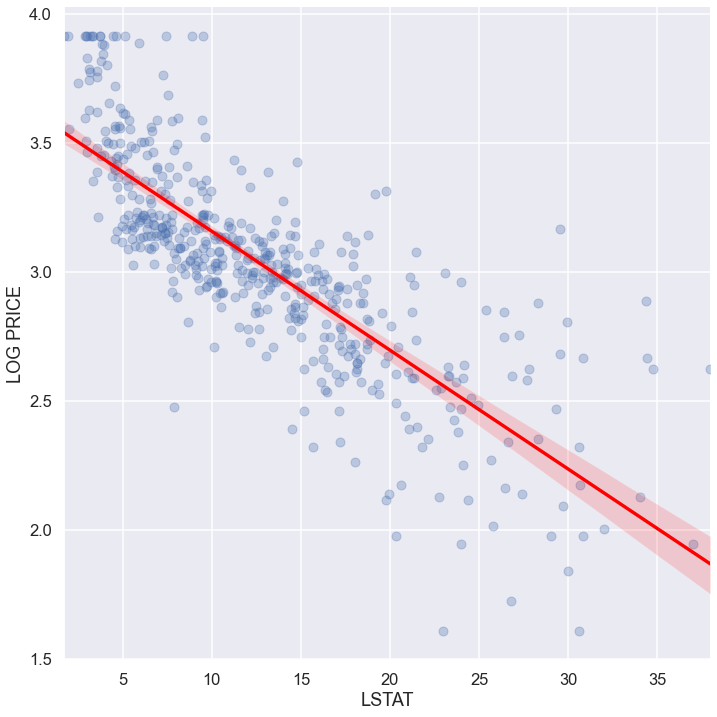

In [248]:
transformed_data = features
transformed_data["LOG PRICE"]= y_log

sns.lmplot(x="LSTAT", y="LOG PRICE", data=transformed_data, size=10, 
 scatter_kws={"alpha": 0.3}, line_kws={"color": "red"})

plt.show()

### Regression Using Log Prices

In [263]:
prices = np.log(data["PRICE"]) # Log prices
features = data.drop("PRICE", axis =1)

X_train, X_test, Y_train, Y_test = train_test_split(features, prices, 
 test_size= 0.2, random_state= 10)

regr= LinearRegression()
regr.fit(X_train, Y_train)

print("Training data r-squared: ", regr.score(X_train, Y_train))
print("test data r-squared: ", regr.score(X_test, Y_test))

print("Intercept: ", regr.intercept_)
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=["coef"])


Training data r-squared:  0.7930234826697583
test data r-squared:  0.7446922306260724
Intercept:  4.05994387177519


coef
CRIM    -0.010672
ZN       0.001579
INDUS    0.002030
CHAS     0.080331
NOX     -0.704068
RM       0.073404
AGE      0.000763
DIS     -0.047633
RAD      0.014565
TAX     -0.000645
PTRATIO -0.034795
B        0.000516
LSTAT   -0.031390

### p-values and Evaluating Coefficients

In [250]:
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(Y_train, X_incl_const)
results= model.fit()

# results.params
results.pvalues

pd.DataFrame({"coef":results.params, "p-value": round(results.pvalues, 4)})

coef  p-value
const    4.059944   0.0000
CRIM    -0.010672   0.0000
ZN       0.001579   0.0086
INDUS    0.002030   0.4445
CHAS     0.080331   0.0382
NOX     -0.704068   0.0000
RM       0.073404   0.0001
AGE      0.000763   0.2092
DIS     -0.047633   0.0000
RAD      0.014565   0.0000
TAX     -0.000645   0.0001
PTRATIO -0.034795   0.0000
B        0.000516   0.0000
LSTAT   -0.031390   0.0000

### Testing for Multicolliearity  

$ TAX = \alpha _0 + \alpha _1 RM + \alpha _2 NOX + ... + \alpha _{12} LSTAT $

$ VIF _{TAX} = \frac{1}{(1 - R _{TAX} ^2)} $

In [251]:
#  len(X_incl_const.columns)
X_incl_const

const      CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD  \
50     1.0   0.08873  21.0   5.64   0.0  0.439  5.963   45.7  6.8147   4.0   
367    1.0  13.52220   0.0  18.10   0.0  0.631  3.863  100.0  1.5106  24.0   
34     1.0   1.61282   0.0   8.14   0.0  0.538  6.096   96.9  3.7598   4.0   
78     1.0   0.05646   0.0  12.83   0.0  0.437  6.232   53.7  5.0141   5.0   
172    1.0   0.13914   0.0   4.05   0.0  0.510  5.572   88.5  2.5961   5.0   
..     ...       ...   ...    ...   ...    ...    ...    ...     ...   ...   
320    1.0   0.16760   0.0   7.38   0.0  0.493  6.426   52.3  4.5404   5.0   
15     1.0   0.62739   0.0   8.14   0.0  0.538  5.834   56.5  4.4986   4.0   
484    1.0   2.37857   0.0  18.10   0.0  0.583  5.871   41.9  3.7240  24.0   
125    1.0   0.16902   0.0  25.65   0.0  0.581  5.986   88.4  1.9929   2.0   
265    1.0   0.76162  20.0   3.97   0.0  0.647  5.560   62.8  1.9865   5.0   

       TAX  PTRATIO       B  LSTAT  
50   243.0     16.8  395.56  13.45  
367  666.0     20.2  131.42  13.33  
34   307.0     21.0  248.31  20.34  
78   398.0     18.7  386.40  12.34  
172  296.0     16.6  396.90  14.69  
..     ...      ...     ...    ...  
320  287.0     19.6  396.90   7.20  
15   307.0     21.0  395.62   8.47  
484  666.0     20.2  370.73  13.34  
125  188.0     19.1  385.02  14.81  
265  264.0     13.0  392.40  10.45  

[404 rows x 14 columns]

In [252]:
vif= []
for i in range(X_incl_const.shape[1]):
    vif.append(variance_inflation_factor(exog = X_incl_const.values, exog_idx=i))
print(vif)

[597.5487126763895, 1.7145250443932485, 2.3328224265597584, 3.943448822674636, 1.0788133385000578, 4.410320817897635, 1.8404053075678568, 3.3267660823099408, 4.222923410477865, 7.314299817005058, 8.508856493040817, 1.839911632651406, 1.3386713255364715, 2.812544292793034]


In [253]:
vif= [variance_inflation_factor(exog = X_incl_const.values, exog_idx=i)
 for i in range(X_incl_const.shape[1])]

pd.DataFrame({"coef_name": X_incl_const.columns, "VIF": np.round(vif,3)})

coef_name      VIF
0      const  597.549
1       CRIM    1.715
2         ZN    2.333
3      INDUS    3.943
4       CHAS    1.079
5        NOX    4.410
6         RM    1.840
7        AGE    3.327
8        DIS    4.223
9        RAD    7.314
10       TAX    8.509
11   PTRATIO    1.840
12         B    1.339
13     LSTAT    2.813

### Model Simplification and the BIC

In [254]:
# reduces model 1. excluding INDUS

X_incl_const = sm.add_constant(X_train)

model = sm.OLS(Y_train, X_incl_const)
results= model.fit()

org_coef = pd.DataFrame({"coef":results.params, "p-value": round(results.pvalues, 4)})

print("BIC: ",results.bic)
print("r-squared: ", results.rsquared)

BIC:  -139.74997769478875
r-squared:  0.7930234826697582


In [255]:
# reduces model 1. excluding INDUS

X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(["INDUS"], axis = 1)

model = sm.OLS(Y_train, X_incl_const)
results= model.fit()

coef_minus_indus = pd.DataFrame({"coef":results.params, "p-value": round(results.pvalues, 4)})

print("BIC: ",results.bic)
print("r-squared: ", results.rsquared)

BIC:  -145.14508855591163
r-squared:  0.7927126289415163


In [256]:
# reduces model 2. excluding INDUS and AGE

X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(["INDUS", "AGE"], axis = 1)

model = sm.OLS(Y_train, X_incl_const)
results= model.fit()

reduced_coef = pd.DataFrame({"coef":results.params, "p-value": round(results.pvalues, 4)})

print("BIC: ",results.bic)
print("r-squared: ", results.rsquared)

BIC:  -149.49934294224656
r-squared:  0.7918657661852815


In [257]:
frames = [org_coef, coef_minus_indus, reduced_coef]
pd.concat(frames, axis=1)

coef  p-value      coef  p-value      coef  p-value
const    4.059944   0.0000  4.056231   0.0000  4.035922   0.0000
CRIM    -0.010672   0.0000 -0.010721   0.0000 -0.010702   0.0000
ZN       0.001579   0.0086  0.001551   0.0097  0.001461   0.0141
INDUS    0.002030   0.4445       NaN      NaN       NaN      NaN
CHAS     0.080331   0.0382  0.082795   0.0320  0.086449   0.0249
NOX     -0.704068   0.0000 -0.673365   0.0000 -0.616448   0.0001
RM       0.073404   0.0001  0.071739   0.0001  0.076133   0.0000
AGE      0.000763   0.2092  0.000766   0.2070       NaN      NaN
DIS     -0.047633   0.0000 -0.049394   0.0000 -0.052692   0.0000
RAD      0.014565   0.0000  0.014014   0.0000  0.013743   0.0000
TAX     -0.000645   0.0001 -0.000596   0.0000 -0.000590   0.0001
PTRATIO -0.034795   0.0000 -0.034126   0.0000 -0.033481   0.0000
B        0.000516   0.0000  0.000511   0.0000  0.000518   0.0000
LSTAT   -0.031390   0.0000 -0.031262   0.0000 -0.030271   0.0000

### Residuals and Residual Plots

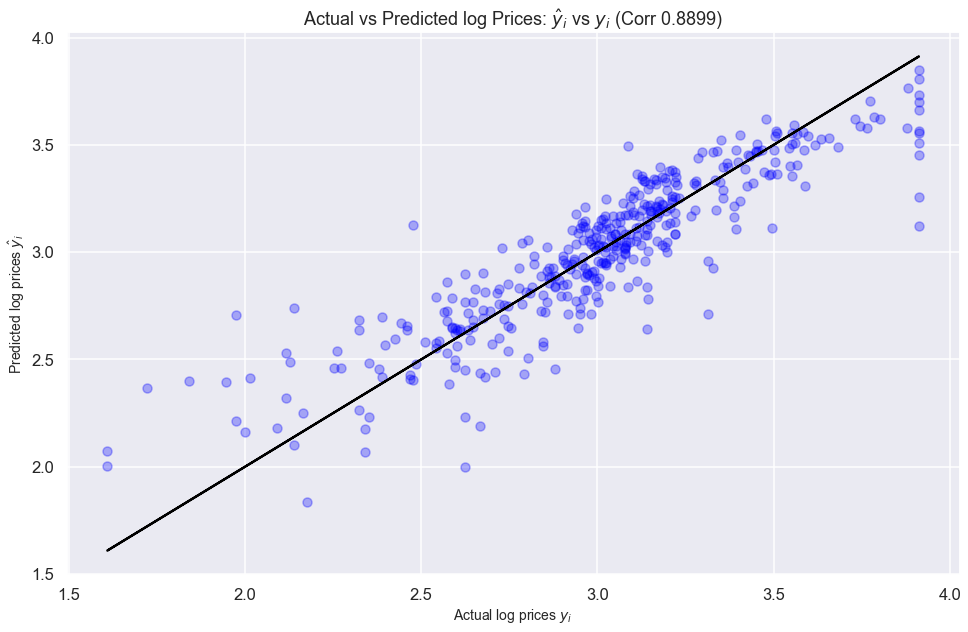

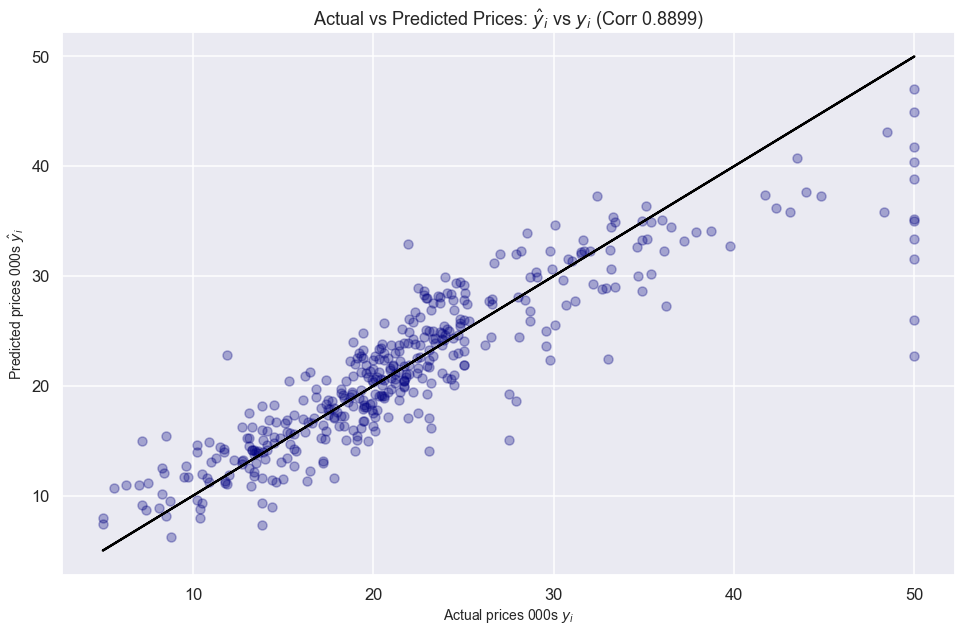

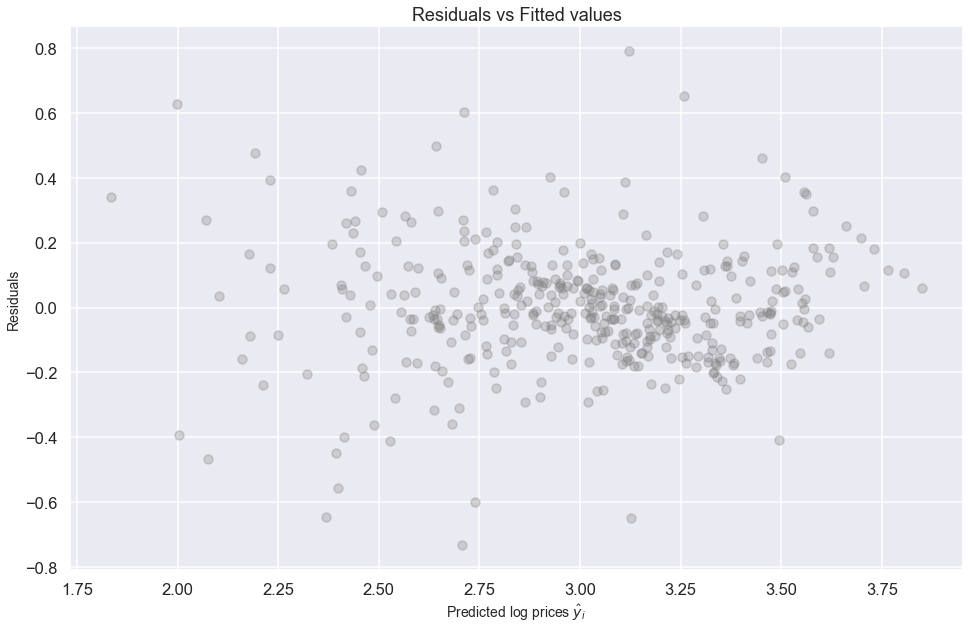

In [266]:
# Modified model: transformed(Using log prices) & simplified(dropping two features)
prices = np.log(data["PRICE"]) # Log prices
features = data.drop(["PRICE", "INDUS", "AGE"], axis =1)

X_train, X_test, Y_train, Y_test = train_test_split(features, prices, 
 test_size= 0.2, random_state= 10)

# Using statsmodel
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(Y_train, X_incl_const)
results= model.fit()

# Graph of actual vs predicted prices
corr= round(Y_train.corr(results.fittedvalues),4)
plt.figure(figsize=(16,10))
plt.scatter(x=Y_train, y=results.fittedvalues, c="blue", alpha= 0.3)
plt.plot(Y_train, Y_train, color= "black")

plt.xlabel("Actual log prices $y _i$", fontsize=14)
plt.ylabel("Predicted log prices $\hat y _i$", fontsize=14)
plt.title(f"Actual vs Predicted log Prices: $\hat y _i$ vs $y _i$ (Corr {corr}) ")
plt.show()

plt.figure(figsize=(16,10))
plt.scatter(x=np.e**Y_train, y=np.e**results.fittedvalues, c="navy", alpha= 0.3)
plt.plot(np.e**Y_train, np.e**Y_train, color= "black")

plt.xlabel("Actual prices 000s $y _i$", fontsize=14)
plt.ylabel("Predicted prices 000s $\hat y _i$", fontsize=14)
plt.title(f"Actual vs Predicted Prices: $\hat y _i$ vs $y _i$ (Corr {corr}) ")
plt.show()

#Residuals vs Predicted values
plt.figure(figsize=(16,10))
plt.scatter(x=results.fittedvalues, y=results.resid, c="grey", alpha= 0.3)

plt.ylabel("Residuals", fontsize=14)
plt.xlabel("Predicted log prices $\hat y _i$", fontsize=14)
plt.title(f"Residuals vs Fitted values")
plt.show()

# Mean square error
reduced_log_mse = round(results.mse_resid,4)
reduced_log_rsuared = round(results.rsquared,4)

C:\Users\mbatu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Log price model: residuals Skew (0.1178) Mean (-0.0)')

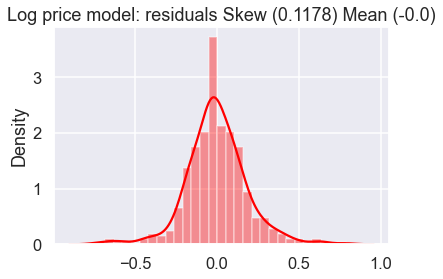

In [267]:
# Residual distrubution, checking for normality
resid_mean=round(results.resid.mean(),4)
resid_skew=round(results.resid.skew(),4)

sns.distplot(results.resid, color="red")
plt.title(f"Log price model: residuals Skew ({resid_skew}) Mean ({resid_mean})")

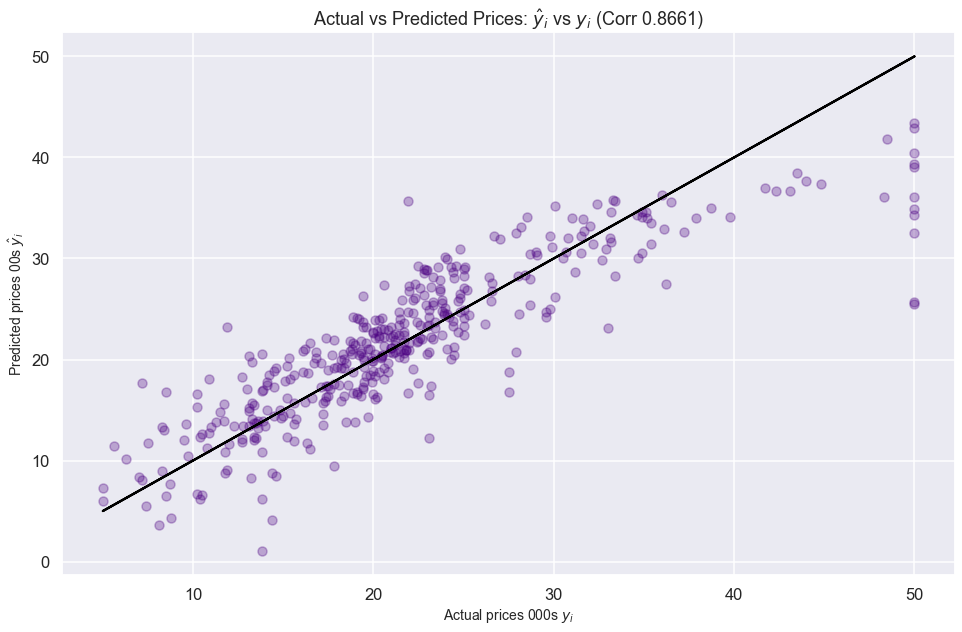

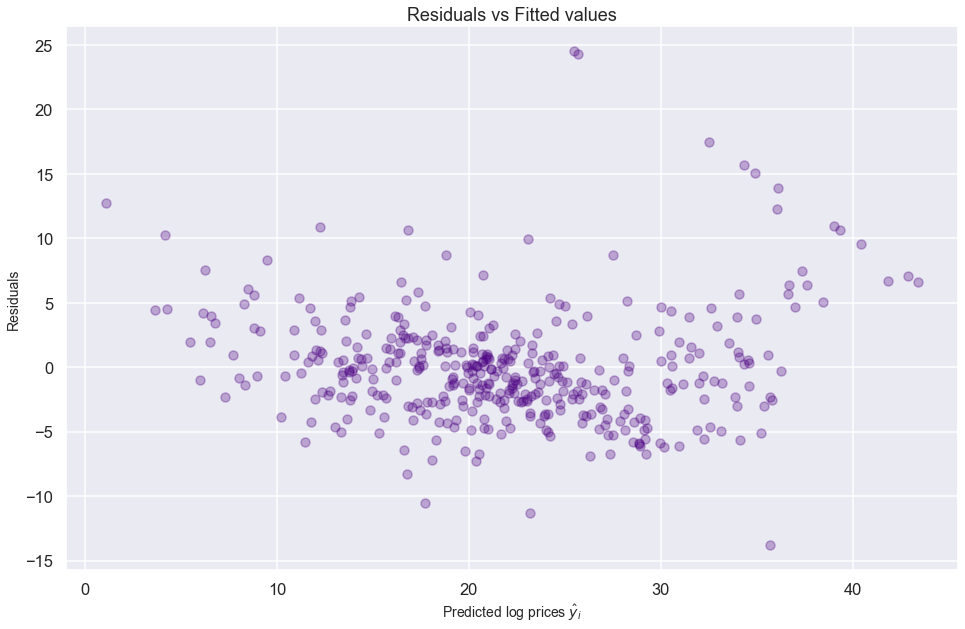

C:\Users\mbatu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


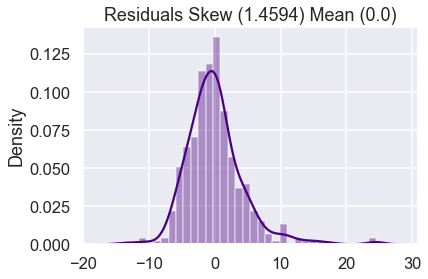

In [271]:
# Original model: normal prices and all features)
prices = data["PRICE"]
features = data.drop(["PRICE"], axis =1)

X_train, X_test, Y_train, Y_test = train_test_split(features, prices, 
 test_size= 0.2, random_state= 10)

X_incl_const = sm.add_constant(X_train)
model = sm.OLS(Y_train, X_incl_const)
results= model.fit()

# Graph of actual vs predicted prices
corr= round(Y_train.corr(results.fittedvalues),4)
plt.figure(figsize=(16,10))
plt.scatter(x=Y_train, y=results.fittedvalues, c="indigo", alpha= 0.3)
plt.plot(Y_train, Y_train, color= "black")

plt.xlabel("Actual prices 000s $y _i$", fontsize=14)
plt.ylabel("Predicted prices 00s $\hat y _i$", fontsize=14)
plt.title(f"Actual vs Predicted Prices: $\hat y _i$ vs $y _i$ (Corr {corr}) ")
plt.show()

#Residuals vs Predicted values
plt.figure(figsize=(16,10))
plt.scatter(x=results.fittedvalues, y=results.resid, c="indigo", alpha= 0.3)

plt.ylabel("Residuals", fontsize=14)
plt.xlabel("Predicted log prices $\hat y _i$", fontsize=14)
plt.title(f"Residuals vs Fitted values")
plt.show()

#Residuals distrubution chart
resid_mean= round(results.resid.mean(),4)
resid_skew= round(results.resid.skew(),4)

sns.distplot(results.resid, color="indigo")
plt.title(f"Residuals Skew ({resid_skew}) Mean ({resid_mean})")

# Mean square error
full_normal_mse = round(results.mse_resid,4)
full_normal_rsuared = round(results.rsquared,4)

In [272]:
# methods done are correct, according to the results shown above

In [276]:
pd.DataFrame({"R-squared": [reduced_log_rsuared, full_normal_rsuared], 
 "MSE": [reduced_log_mse, full_normal_mse],
 "RMSE": np.sqrt([reduced_log_mse, full_normal_mse])},
 index=["Reduuced log model", "Full normal price"])

R-squared      MSE      RMSE
Reduuced log model     0.7919   0.0349  0.186815
Full normal price      0.7501  19.9212  4.463317